# <font color='red'>Lab 03 - Bootstrapping Vermin</font>

### EARTH 468: Data Analysis & Model Estimation

#### Lab developed by E.A. Hetland

#### Due by the beginning of the lab period on October 6, 2021 (two weeks).

**For full credit:** 
Be sure to include your name with your notebook either as a markdown cell or in the file name. 

Write any necessary code in code cells below the description of each question. Write any discussion answers in markdown cells below the code cells, not as comments in your code. Be explicit about what you are answering and write in complete sentences. 

If you are asked to include a plot, make sure to label the axes and include a descriptive title.

To turn in this assignment, in the Jupyter toolbar select File/Download as/html or pdf. Make sure that all of your outputs are clear. Upload the downloaded file to the proper assignment submission page on Canvas. Please do not turn in a .ipynb file.

**Objective:** Learn to implement resampling methods to estimate uncertainty on correlation coefficient determined from a sample.

**Python Objective:** Gain familiarity in working with **NumPy** array structures, and how to slice them using indices. Students will also learn more about how to produce multi-panel plots in **Matplotlib**.

**Data:** This problem uses data on the percentage of households (both owner occupied and rented) in major
US cities that in 2013 reported having a problem with cockroaches or rodents in the past 12 months and
annual average temperatures during 2012–2013 in those cities. The cockroach and rodent reports are from
the American Housing Survey (AHS), US Census (www.census.gov/programs-surveys/ahs/;
accessed August 2016) and the average temperatures are calculated from the 2012–2013 temperature
records of the closest station to the city center from the Global Historical Climatology Network-Monthly
(GHCN-M) data from NOAA (Vose et al, 1992; Peterson & Vose, 1997; ftp.ncdc.noaa.gov/pub/-data/ghcn/v3/; accessed Aug 2016).


# <font color='red'>Import Libraries:</font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# <font color='orange'>Excercise - 40 pts</font>

Data File: 2013_AmHousingSurvey_VerminReports.csv

The data file also includes 2012–2013 summer annual temperature (from GHCN-M), location of the city
center, and the current city population from the Wolfram Alpha Computational Knowledge Engine. We
will only use the roach and rodent reports (in columns 9 and 10 of the data file) and 2012–2013 annual
temperatures (in column 5) for this problem. The below histograms show the distribution of roach or
rodent reports, and the maps depict the roach or rodent reports as colored disks, sized proportional to the
percentage of households reporting the problem and colored according to 2012 annual temperatures:

<img src="Lab03_data_viz.png">

In this lab you will be estimating uncertainties of correlation coefficients determined from data, using a
bootstrapping technique. Bootstrapping is a type of re-sampling method, which are powerful methods to
assess uncertainties on inferred information. They are discussed more in the course reader,
and in preparation for this lab, please read over that section.
In brief, re-sampling methods rely on the fact that a given data set represents a much larger population. In
this case, we will only consider 25 US cities that are in the US Census Housing Report, and while these are
among the most populous, there are many more cities in the US. Re-sampling methods then ask the question,
“what would the inferred information be if we had collected different data?" As we are limited to
working only with the data we did collect, re-sampling creates fictitious data sets based on the available
information. There are two main classes of re-sampling methods, ***jackknifing*** and ***bootstrapping***. The main focus of the lab will be on bootstrapping.

## <font color='red'>a) 2 pts</font>

Create a python list called *numbers* that contains 0, 1, 1, 2, 3, 5, 8, 13, 21, and 34, in that order.

1. Print the fifth item in the list *numbers*.
2. Print the first three items in the list *numbers*.
3. Print the last three items in the list *numbers*.

In [3]:
numbers = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
print(numbers)
numbers[4] # 4th index will get you the 5th item in the list aka 3 (1st item is 0 index)
numbers[0:3] # indexing from 0th item to the 3rd item (not including 3rd item)
numbers[-3:] # indexing in reverse with '-' sign

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


[13, 21, 34]

## <font color='red'>b) 2 pts</font>

Create a python list of lists called *array*. Use the following syntax:

```python
array = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
```

Convert *array* into an np.array with:

```python
array = np.array(array)
```

1. Print *array*.
2. Print the shape of *array*.
3. Print the first column of *array*.
4. Print the last row of *array*.
5. Use the correct indexing to print '9' from *array*.

In [4]:
array = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
array = np.array(array)
print(array)
print(array.shape) # returns the number of rows, number of columns
print(np.shape(array)) # other option for above


[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
(4, 3)
(4, 3)


In [5]:
array[0] # index for the first row
array[:,0] # index for the first column
array[-1] # index for the last row
array[2,2] # index to grab the 9 aka third row and third column

9

## <font color='red'>c) 6 pts</font>

Read the data from *CityData_VerminLab.csv* using **Pandas**. Then, make a new **Pandas** dataframe with just the three pertinent columns of data (*i.e.* mean temperature (C), cockroach reports, and rodent reports). To do this, select a column of data like you would normally, but instead of selecting one column, select a list of multiple columns (see the example below).

```python
newdataframe = dataframe[['Column A','Column B','Column C']]
```

Print out your new dataframe to make sure it worked.

In this assignment, we will be doing repetitive math, so we are better off converting the **Pandas** dataframe into a less memory-intensive data object. Convert your new dataframe into a **numpy** array, using *np.array* (look up the documentation to see how this works!). Print out the new array and examine it. What are the dimensions to the new array (use the *.shape* method)?

In [6]:
dataframe = pd.read_csv('CityData_VerminLab.csv')
dataframe
newdataframe = dataframe[['mean temperature (C)','cockroach reports','rodent reports']]
newdataframe
vermin_data = np.array(newdataframe)
vermin_data # mean temp, cockroach reports, rodent reports
print(vermin_data.shape)
newdataframe

(25, 3)


,mean temperature (C),cockroach reports,rodent reports
0,21.566667,0.282407,0.073925
1,15.193750,0.060701,0.176996
2,11.737500,0.028965,0.173264
3,10.995833,0.039917,0.096415
4,10.995833,0.016779,0.083953
5,11.229167,0.026729,0.155217
6,21.558333,0.340132,0.072338
7,20.654167,0.225118,0.024295
8,21.391667,0.287632,0.019195
9,12.380000,0.063418,0.147332


The dimensions to the new array are 25, 3 (so there are 25 rows and 3 columns).

## <font color='red'>d) 6 pts</font>

Make two scatter plots on the same figure canvas, using data from the array you just created: 

1. Percent of households reporting cockroach problems against the mean annual temperature. 
2. Percent of households reporting rodent problems against the mean annual temperature.

To produce a multi-panel plot, use the following syntax:

```python
fig = plt.figure(figsize=[8,16])
ax1 = fig.add_subplot(211) # (211) means "arranged in a 2 (vertical) by 1 (horizontal) fashion" and the last
                           # 1 is the plot identifier (in plots with several panels, this identifier starts
                           # at 1 in the upper left, and increases going to the right, line by line, as if 
                           # you were reading).
ax2 = fig.add_subplot(212)
```

What, if any, patterns do you see in these plots (specifically with reference to degree of correlations)?

Text(0.5, 1.0, '2013 American Housing Survey Vermin Reports')

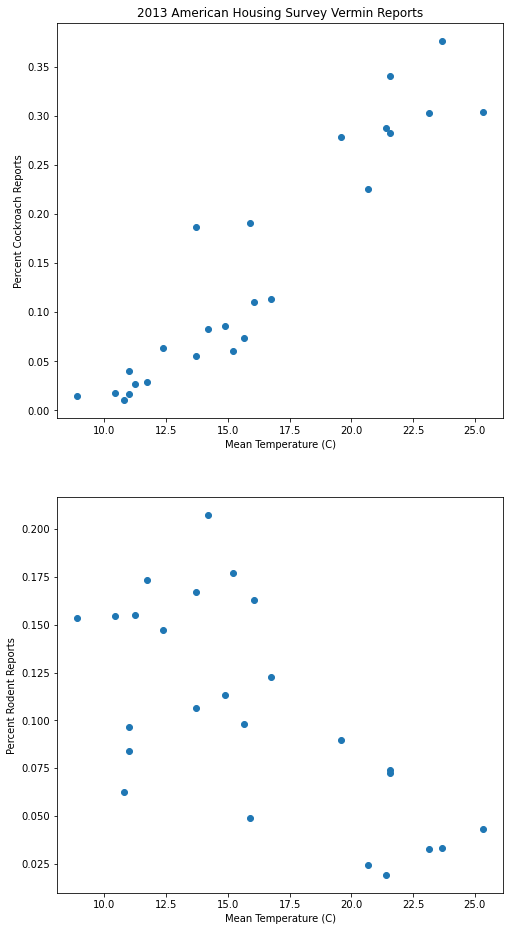

In [22]:
fig = plt.figure(figsize=[8,16])
ax1 = fig.add_subplot(211)
ax1.scatter(vermin_data[:,0],vermin_data[:,1])
ax1.set_xlabel('Mean Temperature (C)')
ax1.set_ylabel('Percent Cockroach Reports')

ax2 = fig.add_subplot(212)
ax2.scatter(vermin_data[:,0],vermin_data[:,2])
ax2.set_xlabel('Mean Temperature (C)')
ax2.set_ylabel('Percent Rodent Reports')

ax1.set_title('2013 American Housing Survey Vermin Reports')

In the first plot for cockroaches, I see a pretty strong, positive linear trend. In the second plot for rodents, I see a pretty weak to moderate, negative linear trend. So, cockroaches maybe prefer the warmer weather, while rodents maybe prefer the colder weather.

## <font color='red'>e) 6 pts</font>

Calculate the correlation coefficients (*i.e.* $\rho_{roach}$ and $\rho_{rodent}$) of the temperature vs. roach or rodents data. In the *scipy.stats* package, correlation coefficient is calculated with the function *pearsonr*. Be sure to look up the documentation on the *pearsonr* function so that you know how many numbers it returns, and what they mean.

In [27]:
from scipy.stats import pearsonr
# ?pearsonr to see what pearsonr does
corrcoeff_roach, z = pearsonr(vermin_data[:,0],vermin_data[:,1]) # outputs correlation coefficient, p value
corrcoeff_roach # positive trend, more refined data so closer to 1 than the other
corrcoeff_rodent, z = pearsonr(vermin_data[:,0],vermin_data[:,2])
corrcoeff_rodent # negative trend, less refined data so closer to 0 than the other

-0.6628005645555644

## <font color='red'>f) 6 pts</font>

We want a larger sample size to further test our results. We can do this using ***bootstrap re-sampling.*** To do this, use python to write a function that:

1. Loops *n* times, where *n* is the same number of data records (i.e., rows) from input array *obs*
2. In each iteration, the function selects a random record from input array *obs* (note: this includes *all* of the observations in that record) and appends that random observation to a new list called *resampled*
3. Returns an array version of *resampled*

Use your new function to re-sample the array of pest and temperature data. The re-sampled data should be the same size as the initial sample. Print out the resampled data and make sure that it worked by comparing it to the original data.

In [41]:
vermin_data[0]
vermin_data.shape[0] # number of rows
np.random.randint(0,vermin_data.shape[0])

9

In [42]:
def bootstrap_resampling(obs):
    
    resampled = [] # empty list
    n = obs.shape[0] # number of rows for the input array
    
    for i in np.arange(n): # iterates through n times
        random_index = np.random.randint(0,obs.shape[0])
        random_row = obs[random_index]
        resampled.append(random_row)
        
    return np.array(resampled)
        

In [44]:
bootstrap_resampling(vermin_data)

array([[1.95762500e+01, 2.78549383e-01, 8.98919753e-02],
       [1.48991667e+01, 8.59990355e-02, 1.13486578e-01],
       [1.09958333e+01, 1.67789131e-02, 8.39526242e-02],
       [2.15583333e+01, 3.40131946e-01, 7.23378554e-02],
       [2.06541667e+01, 2.25117555e-01, 2.42946708e-02],
       [1.51937500e+01, 6.07013064e-02, 1.76996366e-01],
       [2.15583333e+01, 3.40131946e-01, 7.23378554e-02],
       [1.04262500e+01, 1.76158301e-02, 1.54440154e-01],
       [1.67291667e+01, 1.13729508e-01, 1.22745902e-01],
       [2.31375000e+01, 3.03123463e-01, 3.24643384e-02],
       [2.06541667e+01, 2.25117555e-01, 2.42946708e-02],
       [2.13916667e+01, 2.87631693e-01, 1.91946890e-02],
       [1.58929167e+01, 1.90718884e-01, 4.90879828e-02],
       [1.48991667e+01, 8.59990355e-02, 1.13486578e-01],
       [1.09958333e+01, 3.99172699e-02, 9.64150293e-02],
       [1.41916667e+01, 8.32273490e-02, 2.07203541e-01],
       [1.37225000e+01, 1.86721799e-01, 1.67022858e-01],
       [1.12291667e+01, 2.67291

## <font color='red'>g) 6 pts</font>

Resample the pest and temperature dataset 10$^4$ times. Each time, calculate the correlation coefficient between the temperature and cockroach reports, and between the temperature and rodent reports. 

Plot all of the correlation coefficients from each category on its own histogram (you should have two histograms).

In [78]:
cc_roaches = [] # empty lists need to be outside the for loop so the values save in the list each time
cc_rodents = []

for i in np.arange(10000):
    resampled = bootstrap_resampling(vermin_data)
    corrcoeff_roach, z = pearsonr(resampled[:,0],resampled[:,1]) 
    corrcoeff_rodent, z = pearsonr(resampled[:,0],resampled[:,2])
    cc_roaches.append(corrcoeff_roach)
    cc_rodents.append(corrcoeff_rodent)
    
cc_roaches_array = np.array(cc_roaches) # converting list to array
cc_rodents_array = np.array(cc_rodents)

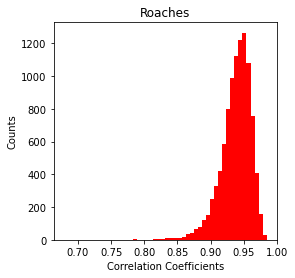

In [91]:
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(cc_roaches_array,bins=50,color='red')
ax.set_xlabel('Correlation Coefficients')
ax.set_ylabel('Counts')
ax.set_title('Roaches')
plt.show() 

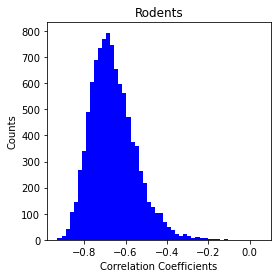

In [88]:
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(cc_rodents_array,bins=50,color='blue')
ax.set_xlabel('Correlation Coefficients')
ax.set_ylabel('Counts')
ax.set_title('Rodents')
plt.show()

## <font color='red'>h) 6 pts</font>

Determine the mean correlation coefficient from the bootstrap re-sampling, $\rho_{roach}^{BS}$ and $\rho_{rodent}^{BS}$. Use the standard deviation of the bootstrap correlation coefficients to estimate the uncertainties and the 95% confidence interval of $\rho_{roach}^{BS}$ and $\rho_{rodent}^{BS}$ *(Hint: use np.percentile)*.

Finally, discuss what this statistical information tells us about the relationship between temperature and pest reports? Did the bootstrapping help? if so, how?

In [80]:
np.mean(cc_roaches_array),np.mean(cc_rodents_array)

(0.9378529481172256, -0.6612396810426737)

In [81]:
np.std(cc_roaches_array),np.std(cc_rodents_array)

(0.02299731400245901, 0.10899893665679719)

In [82]:
np.percentile(cc_roaches_array,[2.5,97.5]) # includes most of that data

array([0.88265104, 0.97126861])

In [83]:
np.percentile(cc_rodents_array,[2.5,97.5])

array([-0.83747615, -0.41285262])

The mean of the correlation coefficients for roaches is about 0.938, which tells us there is a strong, positive trend between roach reports and temperature (so roaches likely prefer warmer weather as there are more roach reports in warm weather). The mean of the correlation coefficients for rodents is about -0.661, which tells us there is a moderate, negative trend between rodent reports and temperature (so rodents likely prefer colder weather as there are more rodent reports in cold weather). The standard deviation of the correlation coefficients for roaches and rodents is about 0.023 and 0.109, respectively. The rodent standard deviation is bigger, which tells us there was a larger extent of deviation from the mean (the dataset was more spread out) for rodents than roaches. The 95% confidence interval for roaches was about 0.883, 0.971. The 95% confidence interval for rodents was about -0.837, -0.423. So, there is a smaller range with the roach confidence interval. The roach dataset was more refined so we have more confidence in that mean and strong, positive trend. The bootstrapping did help as it allowed us to have a larger sample size so we could further test our results and our confidence in our results.